<a href="https://colab.research.google.com/github/oxanaRC/CE902/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13.08.21
Upload three csv files:
1. dataset for training and testing 
2. dataset for validation
3. dataset for records identification ('location key', 'postal code' and 'district) - this to be joined with data after predictions were done so the quality of predictions could be analysed by location.



In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving train_and_test_data.csv to train_and_test_data.csv
Saving locations_categorical_features.csv to locations_categorical_features.csv
Saving validation_data.csv to validation_data.csv
User uploaded file "train_and_test_data.csv" with length 161197304 bytes
User uploaded file "locations_categorical_features.csv" with length 27802193 bytes
User uploaded file "validation_data.csv" with length 5499459 bytes


In [2]:
import pandas as pd
from pathlib import Path

In [3]:
df_location_categories = pd.read_csv("locations_categorical_features.csv") 
df_location_categories

,location_key,postcode,district
0,100000460_235813700_173697830,IP28 6QS,ST EDMUNDSBURY
1,100000900_306645770_193413260,PO2 9AE,PORTSMOUTH
2,100001709_306232250_192988720,PO2 8NT,PORTSMOUTH
3,100002450_241021470_178393000,IP33 3UF,ST EDMUNDSBURY
4,100002500_240933210_178314290,IP33 3UE,ST EDMUNDSBURY
...,...,...,...
562389,99996800_303056370_189735890,PO16 9PA,FAREHAM
562390,99998470_302856560_189531620,PO16 9UH,FAREHAM
562391,99998690_306575700_193341460,PO2 9BS,PORTSMOUTH
562392,9999870_270237390_170268490,SE21 7EU,SOUTHWARK


In [4]:
df_train_test_data = pd.read_csv("train_and_test_data.csv") 
df_train_test_data

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,price_paid
0,1,L,T,23.0,110.178111,0.671216,96.0,0.5,0.9,60250.00000,56187.50000,7,26510768000,718540000,11622296000,53.489825,-2.358860,100000.0
1,1,L,S,24.0,78.275669,0.320619,15.0,10.8,9.4,79166.66667,79000.00000,23,26539970000,542647000,11902983000,53.528583,-2.270335,79500.0
2,1,L,F,12.0,85.979811,0.584296,20.0,11.5,9.8,73416.66667,64341.66667,4,16016690000,25505656000,21724217000,52.637255,1.298314,128000.0
3,1,L,F,3.0,89.636307,0.452391,13.0,9.7,8.3,101666.66670,101666.66670,14,6296533000,26014878000,18039516000,51.868112,0.544362,170000.0
4,1,L,F,34.0,94.537513,0.458854,63.0,8.1,7.7,25562.50000,25000.00000,9,28437687000,4781898000,12633222000,53.420228,-2.966120,33000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135504,47,L,T,12.0,72.452903,1.542007,39.0,8.5,7.5,37625.00000,40499.37500,14,27236922000,1773271000,12075555000,53.502594,-2.516861,79000.0
1135505,48,F,S,1.0,0.000000,0.000000,0.0,0.0,0.0,40000.00000,50500.00000,16,21104985000,21110074000,12654123000,51.674615,-3.212091,53000.0
1135506,55,F,T,1.0,0.000000,0.000000,0.0,0.0,0.0,41333.33333,45416.66667,14,27804846000,6355589000,11793603000,53.245090,-3.123599,70000.0
1135507,81,L,T,1.0,88.443148,2.462274,25.0,9.7,7.7,54000.00000,56650.00000,16,28051597900,2906478000,14022715000,53.734079,-2.140287,95000.0


In [5]:
df_validation_data = pd.read_csv("validation_data.csv") 
df_validation_data

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,price_paid
0,1,L,F,54.0,92.304597,0.543902,36.0,11.4,9.6,295000.00000,330000.00000,26,770794900,26771245000,16701868000,51.446749,-0.137157,314000.0
1,1,F,T,35.0,78.178630,0.086689,36.0,8.9,8.4,113333.33330,119166.66670,26,2095469000,26684681000,17218624000,51.564821,0.123801,225000.0
2,1,L,F,11.0,67.921534,0.836103,32.0,7.6,7.0,92750.00000,80000.00000,26,10333301000,30370523000,19027695000,50.830953,-1.173732,120000.0
3,1,L,F,60.0,104.272807,0.530036,60.0,9.2,8.7,302500.00000,279821.42860,26,502176000,26527685000,16536000000,51.478533,-0.121591,500000.0
4,1,L,F,9.0,125.415966,0.658497,39.0,9.0,7.6,42000.00000,42908.33333,26,32407942000,6604266000,17029935000,53.856740,-3.027827,52000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38382,11,F,D,12.0,84.705333,0.424683,42.0,7.8,6.7,48583.33333,57500.00000,26,25966523900,3773829000,12954650000,53.642111,-1.748224,415000.0
38383,11,F,D,45.0,90.592648,0.935044,53.0,10.7,8.1,70250.00000,79583.33333,26,15885462000,11716322000,410900900,52.445938,-1.924921,900000.0
38384,12,F,D,1.0,14.057832,4.594217,10.0,10.6,10.5,98833.33333,92500.00000,26,11001257000,15043775000,5857544000,52.327517,-1.079233,840000.0
38385,13,F,D,42.0,86.608374,0.258647,51.0,9.7,8.2,40875.00000,59333.33333,26,16388710900,11226349000,417089900,52.486194,-1.966257,660000.0


In [6]:
#remove outliers
df_train_test_data=df_train_test_data[(df_train_test_data['num_of_beds'] <=5) & (df_train_test_data['price_paid'] > 10000) & (df_train_test_data['price_paid'] <1500000) ]
df_validation_data=df_validation_data[(df_validation_data['num_of_beds'] <=5) & (df_validation_data['price_paid'] > 10000) & (df_validation_data['price_paid'] <1500000) ]

In [7]:
estateTypes=df_train_test_data['estate_type'].unique()
estateTypes

array(['L', 'F'], dtype=object)

In [8]:
df_train_test_data['estate_type'] =df_train_test_data['estate_type'].map({'F':'2',
                             'L':'1'})
df_validation_data['estate_type'] =df_validation_data['estate_type'].map({'F':'2',
                             'L':'1'})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
propertyTypes=df_train_test_data['property_type'].unique()
propertyTypes

array(['T', 'S', 'F', 'D'], dtype=object)

In [10]:
df_train_test_data['property_type'] =df_train_test_data['property_type'].map({'O':'5','D':'4','S':'3','T':'2','F':'1'})
df_validation_data['property_type'] =df_validation_data['property_type'].map({'O':'5','D':'4','S':'3','T':'2','F':'1'})

              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#shuffle the train_test dataset
df_train_test_data = df_train_test_data.sample(frac = 1)
df_train_test_data

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,price_paid
227566,2,1,2,13.0,82.724706,1.067531,25.0,8.6,7.2,53750.00000,51833.33333,23,22063571000,5801056000,10217735000,53.348787,-1.404556,105000.0
750047,3,2,4,1.0,129.968523,1.186351,27.0,7.9,7.7,123000.00000,115833.33330,12,9771187000,32233473000,20994374000,50.725231,-0.786731,245000.0
639926,3,2,2,4.0,63.620074,0.706373,32.0,10.7,9.8,37666.66667,37000.00000,4,23725233000,5225494000,11675501000,53.496408,-1.461823,66500.0
211939,2,1,1,25.0,32.483501,0.441366,3.0,16.8,16.8,222410.37500,247000.00000,9,1358806000,26352719000,16026943000,51.427991,-0.307980,404000.0
1010121,4,2,4,1.0,106.276094,0.406521,19.0,7.9,8.2,72500.00000,72500.00000,3,13544140000,22980506000,18526406000,52.565688,0.829689,315000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263615,2,1,1,51.0,93.781781,0.440860,28.0,11.5,10.2,315000.00000,350000.00000,19,633395000,26588718900,16502804000,51.456547,-0.161948,770000.0
679183,3,2,2,6.0,104.909392,1.158762,40.0,8.7,7.1,90833.33333,86250.00000,4,8229961900,33523954000,24134543000,51.137782,0.852882,242500.0
106361,2,2,2,6.0,79.818720,2.082417,29.0,9.1,7.8,85000.00000,83000.00000,23,15043072000,13332959000,2094170000,52.295253,-1.957213,159000.0
12886,1,1,1,50.0,87.078244,0.760804,17.0,12.3,11.8,197500.00000,158333.33330,17,1046581000,25343316000,15596762000,51.603781,-0.125567,235000.0


In [12]:
dataset = df_train_test_data.values
dataset

array([[2, '1', '2', ..., 53.348787, -1.404556, 105000.0],
       [3, '2', '4', ..., 50.725231, -0.7867310000000001, 245000.0],
       [3, '2', '2', ..., 53.496407999999995, -1.4618229999999999,
        66500.0],
       ...,
       [2, '2', '2', ..., 52.295253, -1.957213, 159000.0],
       [1, '1', '1', ..., 51.603781, -0.125567, 235000.0],
       [3, '2', '2', ..., 55.039391, -1.553763, 143000.0]], dtype=object)

In [13]:
X1 = dataset[:,0:17]
Y1 = dataset[:,17]
#all features

In [14]:
validation_dataset=df_validation_data.values
validation_dataset

array([[1, '1', '1', ..., 51.446749, -0.137157, 314000.0],
       [1, '2', '2', ..., 51.564821, 0.123801, 225000.0],
       [1, '1', '1', ..., 50.830953, -1.173732, 120000.0],
       ...,
       [5, '2', '4', ..., 51.800098999999996, 0.725616, 560000.0],
       [5, '2', '2', ..., 50.834804999999996, -0.137428, 542000.0],
       [5, '2', '4', ..., 50.778189000000005, 0.102345, 412000.0]],
      dtype=object)

In [15]:
X_Validation=validation_dataset[:,0:17]
Y_Validation =validation_dataset[:,17]

In [16]:
from sklearn import preprocessing

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()

In [18]:
X1_scale = min_max_scaler.fit_transform(X1)
X1_scale

array([[0.25      , 0.        , 0.33333333, ..., 0.27055489, 0.581269  ,
        0.57624177],
       [0.5       , 1.        , 1.        , ..., 0.55781135, 0.13066046,
        0.65906088],
       [0.5       , 1.        , 0.33333333, ..., 0.30941233, 0.60662362,
        0.56856516],
       ...,
       [0.25      , 1.        , 0.33333333, ..., 0.05401738, 0.4003194 ,
        0.5021584 ],
       [0.        , 0.        , 0.        , ..., 0.41393542, 0.28155571,
        0.74768956],
       [0.5       , 1.        , 0.33333333, ..., 0.75901569, 0.87163848,
        0.55624065]])

In [19]:

print(min(Y1))
print(max(Y1))

12000.0
1499999.0


In [20]:
X_Validation_scale = min_max_scaler.transform(X_Validation)
X_Validation_scale

array([[0.        , 0.        , 0.        , ..., 0.44339255, 0.2545847 ,
        0.74613592],
       [0.        , 1.        , 0.33333333, ..., 0.45716693, 0.27486414,
        0.7811172 ],
       [0.        , 0.        , 0.        , ..., 0.50538858, 0.14881873,
        0.6071836 ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.51753351, 0.31527428,
        0.86179018],
       [1.        , 1.        , 0.33333333, ..., 0.58441786, 0.14948033,
        0.7460996 ],
       [1.        , 1.        , 1.        , ..., 0.62355058, 0.13975626,
        0.77824104]])

In [21]:
print(min(Y_Validation))
print(max(Y_Validation))

18000.0
1495000.0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_scale, Y1, test_size=0.3)

In [24]:
print(X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape)

(785599, 17) (336686, 17) (785599,) (336686,)


In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [26]:
model = Sequential([
    Dense(500, activation='relu', input_shape=X1_train.shape[1:]),
    Dense(1)
])

In [33]:
my_optimizer = keras.optimizers.Adam(learning_rate=0.009)
model.compile(
              loss='mean_squared_error',
               optimizer=my_optimizer)

In [28]:
import numpy as np

In [29]:
X1_train = np.asarray(X1_train).astype('float32')

In [30]:
Y1_train = np.asarray(Y1_train).astype('float32')

In [31]:
X1_test = np.asarray(X1_test).astype('float32')
Y1_test = np.asarray(Y1_test).astype('float32')

In [34]:
hist = model.fit(X1_train, Y1_train,
          epochs=100,
          validation_data=(X1_test, Y1_test))

Epoch 1/100
24550/24550 [==============================] - 58s 2ms/step - loss: 25812304222.7735 - val_loss: 8749244416.0000
Epoch 2/100
24550/24550 [==============================] - 51s 2ms/step - loss: 8137097201.6312 - val_loss: 7290145280.0000
Epoch 3/100
24550/24550 [==============================] - 51s 2ms/step - loss: 6956610725.3974 - val_loss: 6562241024.0000
Epoch 4/100
24550/24550 [==============================] - 52s 2ms/step - loss: 6236412984.7974 - val_loss: 6314591744.0000
Epoch 5/100
24550/24550 [==============================] - 49s 2ms/step - loss: 5993904052.9653 - val_loss: 6232115712.0000
Epoch 6/100
24550/24550 [==============================] - 50s 2ms/step - loss: 5927041387.6720 - val_loss: 6187202048.0000
Epoch 7/100
24550/24550 [==============================] - 48s 2ms/step - loss: 5874964078.4248 - val_loss: 6163137536.0000
Epoch 8/100
24550/24550 [==============================] - 52s 2ms/step - loss: 5833382049.4142 - val_loss: 6145315328.0000
Epoch 9

In [35]:
prediction1=model.predict(X1_test)
#print(prediction1)

In [36]:
prediction_df1 = pd.DataFrame(min_max_scaler.inverse_transform(X1_test)) 
prediction_df1.columns =['num_of_beds', 'estate_type', 'property_type','num_of_sec_sch','score_disadv','closest_sch_distance', 'closest_disadv_prct',	'closest_aver_attain_eng',	'closest_aver_attain_math','median_ppb_3mnths_ago','median_ppb_4mnths_ago','hist_mnth',	'distances_Lond',	'distances_Manch',	'distances_Birming','lat',	'long']
prediction_df1['Y1'] = Y1_test
prediction_df1['predictions1'] = prediction1
prediction_df1['error1']=prediction_df1['Y1']-prediction_df1['predictions1']
prediction_df1['sq_error1']=pow((prediction_df1['Y1']-prediction_df1['predictions1']),2)
prediction_df1['root_sq_error1']=pow(pow((prediction_df1['Y1']-prediction_df1['predictions1']),2),0.5)
prediction_df1['location_key']=(round((prediction_df1['distances_Lond']*0.01),0).astype(int)).astype(str) + '_' + (round((prediction_df1['distances_Manch']*0.01),0).astype(int)).astype(str)+ '_' + (round((prediction_df1['distances_Birming']*0.01),0).astype(int)).astype(str)
prediction_df1

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,Y1,predictions1,error1,sq_error1,root_sq_error1,location_key
0,3.0,2.0,2.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,70583.335938,60916.664062,22.0,2.088059e+10,2.296309e+10,1.402640e+10,51.495689,-3.184577,255000.0,168629.671875,86370.328125,7.459833e+09,86370.326756,208805929_229630894_140264028
1,3.0,2.0,2.0,10.000000,106.676300,1.403099,48.000000,7.100000,6.8,55000.000000,47333.332031,25.0,2.710206e+10,6.497453e+09,1.522770e+10,53.823093,-1.451814,114000.0,112109.757812,1890.242188,3.573016e+06,1890.242180,271020605_64974531_152276982
2,3.0,2.0,3.0,7.000000,49.287342,0.663791,14.000000,10.800000,10.3,66208.335938,69250.000000,20.0,1.182636e+10,1.428994e+10,4.857615e+09,52.356911,-1.218438,230000.0,209744.156250,20255.843750,4.102992e+08,20255.843601,118263583_142899364_48576148
3,3.0,2.0,3.0,1.000000,11.359764,5.506097,23.000000,10.000000,9.4,83333.335938,94375.000000,22.0,1.516022e+10,2.376100e+10,1.995417e+10,52.660057,1.032738,214000.0,236865.984375,-22865.984375,5.228532e+08,22865.984518,151602196_237609964_199541658
4,3.0,2.0,2.0,4.000000,149.709503,0.575685,27.000002,9.000000,8.4,62499.996094,58166.664062,20.0,1.695921e+10,2.884226e+10,2.463128e+10,52.492020,1.732711,171000.0,149913.171875,21086.828125,4.446543e+08,21086.828496,169592136_288422625_246312796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336681,2.0,2.0,3.0,2.000000,76.942886,1.832739,35.000000,7.800000,7.0,102500.000000,100125.000000,10.0,1.135225e+10,3.541953e+10,2.673629e+10,51.198963,1.387752,375000.0,233757.656250,141242.343750,1.994940e+10,141242.345152,113522493_354195251_267362857
336682,2.0,2.0,3.0,3.000000,27.096571,2.815883,13.000000,11.099999,10.3,66666.664062,65833.335938,16.0,2.280158e+10,3.691899e+09,7.691540e+09,53.151318,-2.187123,184000.0,154975.562500,29024.437500,8.424180e+08,29024.437703,228015759_36918991_76915400
336683,3.0,1.0,2.0,21.999998,110.724167,0.726945,29.000000,10.500000,8.8,56250.000000,64250.000000,16.0,2.756755e+10,4.173657e+09,1.180347e+10,53.374683,-2.855344,150000.0,140981.687500,9018.312500,8.132996e+07,9018.312481,275675484_41736571_118034678
336684,2.0,2.0,2.0,2.000000,85.470459,0.922646,26.000000,8.900000,7.4,77500.000000,62666.664062,10.0,1.649769e+10,1.848127e+10,8.354376e+09,51.826271,-2.506266,120000.0,146295.593750,-26295.593750,6.914582e+08,26295.593547,164976906_184812667_83543757


In [37]:
data_for_prediction_analysis = pd.merge(prediction_df1, df_location_categories, how="left", on="location_key")
data_for_prediction_analysis['postcode_area']=data_for_prediction_analysis['postcode'].str.split(' ').str[0]
data_for_prediction_analysis

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,Y1,predictions1,error1,sq_error1,root_sq_error1,location_key,postcode,district,postcode_area
0,3.0,2.0,2.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,70583.335938,60916.664062,22.0,2.088059e+10,2.296309e+10,1.402640e+10,51.495689,-3.184577,255000.0,168629.671875,86370.328125,7.459833e+09,86370.326756,208805929_229630894_140264028,NaN,NaN,NaN
1,3.0,2.0,2.0,10.000000,106.676300,1.403099,48.000000,7.100000,6.8,55000.000000,47333.332031,25.0,2.710206e+10,6.497453e+09,1.522770e+10,53.823093,-1.451814,114000.0,112109.757812,1890.242188,3.573016e+06,1890.242180,271020605_64974531_152276982,NaN,NaN,NaN
2,3.0,2.0,3.0,7.000000,49.287342,0.663791,14.000000,10.800000,10.3,66208.335938,69250.000000,20.0,1.182636e+10,1.428994e+10,4.857615e+09,52.356911,-1.218438,230000.0,209744.156250,20255.843750,4.102992e+08,20255.843601,118263583_142899364_48576148,NaN,NaN,NaN
3,3.0,2.0,3.0,1.000000,11.359764,5.506097,23.000000,10.000000,9.4,83333.335938,94375.000000,22.0,1.516022e+10,2.376100e+10,1.995417e+10,52.660057,1.032738,214000.0,236865.984375,-22865.984375,5.228532e+08,22865.984518,151602196_237609964_199541658,NaN,NaN,NaN
4,3.0,2.0,2.0,4.000000,149.709503,0.575685,27.000002,9.000000,8.4,62499.996094,58166.664062,20.0,1.695921e+10,2.884226e+10,2.463128e+10,52.492020,1.732711,171000.0,149913.171875,21086.828125,4.446543e+08,21086.828496,169592136_288422625_246312796,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336681,2.0,2.0,3.0,2.000000,76.942886,1.832739,35.000000,7.800000,7.0,102500.000000,100125.000000,10.0,1.135225e+10,3.541953e+10,2.673629e+10,51.198963,1.387752,375000.0,233757.656250,141242.343750,1.994940e+10,141242.345152,113522493_354195251_267362857,NaN,NaN,NaN
336682,2.0,2.0,3.0,3.000000,27.096571,2.815883,13.000000,11.099999,10.3,66666.664062,65833.335938,16.0,2.280158e+10,3.691899e+09,7.691540e+09,53.151318,-2.187123,184000.0,154975.562500,29024.437500,8.424180e+08,29024.437703,228015759_36918991_76915400,NaN,NaN,NaN
336683,3.0,1.0,2.0,21.999998,110.724167,0.726945,29.000000,10.500000,8.8,56250.000000,64250.000000,16.0,2.756755e+10,4.173657e+09,1.180347e+10,53.374683,-2.855344,150000.0,140981.687500,9018.312500,8.132996e+07,9018.312481,275675484_41736571_118034678,NaN,NaN,NaN
336684,2.0,2.0,2.0,2.000000,85.470459,0.922646,26.000000,8.900000,7.4,77500.000000,62666.664062,10.0,1.649769e+10,1.848127e+10,8.354376e+09,51.826271,-2.506266,120000.0,146295.593750,-26295.593750,6.914582e+08,26295.593547,164976906_184812667_83543757,NaN,NaN,NaN


In [38]:
#check NA in data_for_prediction_analysis
data_for_prediction_analysis_na=data_for_prediction_analysis[(data_for_prediction_analysis['postcode'].isnull())]
data_for_prediction_analysis_na

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,Y1,predictions1,error1,sq_error1,root_sq_error1,location_key,postcode,district,postcode_area
0,3.0,2.0,2.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,70583.335938,60916.664062,22.0,2.088059e+10,2.296309e+10,1.402640e+10,51.495689,-3.184577,255000.0,168629.671875,86370.328125,7.459833e+09,86370.326756,208805929_229630894_140264028,NaN,NaN,NaN
1,3.0,2.0,2.0,10.000000,106.676300,1.403099,48.000000,7.100000,6.8,55000.000000,47333.332031,25.0,2.710206e+10,6.497453e+09,1.522770e+10,53.823093,-1.451814,114000.0,112109.757812,1890.242188,3.573016e+06,1890.242180,271020605_64974531_152276982,NaN,NaN,NaN
2,3.0,2.0,3.0,7.000000,49.287342,0.663791,14.000000,10.800000,10.3,66208.335938,69250.000000,20.0,1.182636e+10,1.428994e+10,4.857615e+09,52.356911,-1.218438,230000.0,209744.156250,20255.843750,4.102992e+08,20255.843601,118263583_142899364_48576148,NaN,NaN,NaN
3,3.0,2.0,3.0,1.000000,11.359764,5.506097,23.000000,10.000000,9.4,83333.335938,94375.000000,22.0,1.516022e+10,2.376100e+10,1.995417e+10,52.660057,1.032738,214000.0,236865.984375,-22865.984375,5.228532e+08,22865.984518,151602196_237609964_199541658,NaN,NaN,NaN
4,3.0,2.0,2.0,4.000000,149.709503,0.575685,27.000002,9.000000,8.4,62499.996094,58166.664062,20.0,1.695921e+10,2.884226e+10,2.463128e+10,52.492020,1.732711,171000.0,149913.171875,21086.828125,4.446543e+08,21086.828496,169592136_288422625_246312796,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336681,2.0,2.0,3.0,2.000000,76.942886,1.832739,35.000000,7.800000,7.0,102500.000000,100125.000000,10.0,1.135225e+10,3.541953e+10,2.673629e+10,51.198963,1.387752,375000.0,233757.656250,141242.343750,1.994940e+10,141242.345152,113522493_354195251_267362857,NaN,NaN,NaN
336682,2.0,2.0,3.0,3.000000,27.096571,2.815883,13.000000,11.099999,10.3,66666.664062,65833.335938,16.0,2.280158e+10,3.691899e+09,7.691540e+09,53.151318,-2.187123,184000.0,154975.562500,29024.437500,8.424180e+08,29024.437703,228015759_36918991_76915400,NaN,NaN,NaN
336683,3.0,1.0,2.0,21.999998,110.724167,0.726945,29.000000,10.500000,8.8,56250.000000,64250.000000,16.0,2.756755e+10,4.173657e+09,1.180347e+10,53.374683,-2.855344,150000.0,140981.687500,9018.312500,8.132996e+07,9018.312481,275675484_41736571_118034678,NaN,NaN,NaN
336684,2.0,2.0,2.0,2.000000,85.470459,0.922646,26.000000,8.900000,7.4,77500.000000,62666.664062,10.0,1.649769e+10,1.848127e+10,8.354376e+09,51.826271,-2.506266,120000.0,146295.593750,-26295.593750,6.914582e+08,26295.593547,164976906_184812667_83543757,NaN,NaN,NaN


In [39]:
from google.colab import files
with open('test data predictions.csv', 'w') as f:
  #f.write('some content')
  data_for_prediction_analysis.to_csv('test data predictions.csv', index=False)
files.download('test data predictions.csv')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
root_mse1=pow(prediction_df1['sq_error1'].sum()/prediction_df1['sq_error1'].count(),0.5)
root_mse1

75559.305054217

In [42]:
#considering good prediction where error 10% or less
prediction_df1['error_perc']=100*prediction_df1['root_sq_error1']/prediction_df1['Y1']
good_prediction_10pc_df1 =prediction_df1[(prediction_df1['error_perc'] <=10) ] 
#good_prediction_10pc_df1
within_10pc_error1=100*good_prediction_10pc_df1.shape[0]/prediction_df1.shape[0]
print('Predictions where error is 10% or less :' + str(within_10pc_error1) + ' %')
#considering good prediction where error 15% or less
good_prediction_15pc_df1 =prediction_df1[(prediction_df1['error_perc'] <=15) ] 
#considering predictions where error 20% or less
prediction_20pc_df1 =prediction_df1[(prediction_df1['error_perc'] <=20) ] 
#considering predictions where error 50% or more
prediction_over50pc_df1 =prediction_df1[(prediction_df1['error_perc'] >=50) ] 
#good_prediction_15pc_df1
within_15pc_error1=100*good_prediction_15pc_df1.shape[0]/prediction_df1.shape[0]
print('Predictions where error is 15% or less :' + str(within_15pc_error1) + ' %')
#prediction_20pc_df1
within_20pc_error1=100*prediction_20pc_df1.shape[0]/prediction_df1.shape[0]
print('Predictions where error is 20% or less :' + str(within_20pc_error1) + ' %')
#prediction_50pc_df1
within_50pc_error1=100*prediction_over50pc_df1.shape[0]/prediction_df1.shape[0]
print('Predictions where error is 50% or more :' + str(within_50pc_error1) + ' %')

Predictions where error is 10% or less :36.6875961578444 %
Predictions where error is 15% or less :51.82395466398959 %
Predictions where error is 20% or less :64.07661738236814 %
Predictions where error is 50% or more :6.2785503406735055 %


In [43]:
prediction_validation=model.predict(X_Validation_scale)

In [44]:
prediction_validation_df = pd.DataFrame(min_max_scaler.inverse_transform(X_Validation_scale)) 
prediction_validation_df.columns =['num_of_beds', 'estate_type', 'property_type','num_of_sec_sch','score_disadv','closest_sch_distance', 'closest_disadv_prct',	'closest_aver_attain_eng',	'closest_aver_attain_math','median_ppb_3mnths_ago','median_ppb_4mnths_ago','hist_mnth',	'distances_Lond',	'distances_Manch',	'distances_Birming','lat',	'long']
prediction_validation_df['Y_val_data'] = Y_Validation
prediction_validation_df['predictions_validation'] = prediction_validation
prediction_validation_df['error1']=prediction_validation_df['predictions_validation']-prediction_validation_df['Y_val_data']
prediction_validation_df['sq_error1']=pow((prediction_validation_df['predictions_validation']-prediction_validation_df['Y_val_data']),2)
prediction_validation_df['root_sq_error1']=pow(pow((prediction_validation_df['predictions_validation']-prediction_validation_df['Y_val_data']),2),0.5)
prediction_validation_df['location_key']=(round((prediction_validation_df['distances_Lond']*0.01),0).astype(int)).astype(str) + '_' + (round((prediction_validation_df['distances_Manch']*0.01),0).astype(int)).astype(str)+ '_' + (round((prediction_validation_df['distances_Birming']*0.01),0).astype(int)).astype(str)
prediction_validation_df

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,Y_val_data,predictions_validation,error1,sq_error1,root_sq_error1,location_key
0,1.0,1.0,1.0,54.0,92.304597,0.543902,36.0,11.4,9.6,295000.0000,330000.00000,26.0,7.707949e+08,2.677124e+10,1.670187e+10,51.446749,-0.137157,314000,461159.18750,147159,2.16558e+10,147159,7707949_267712450_167018680
1,1.0,2.0,2.0,35.0,78.178630,0.086689,36.0,8.9,8.4,113333.3333,119166.66670,26.0,2.095469e+09,2.668468e+10,1.721862e+10,51.564821,0.123801,225000,237545.40625,12545.4,1.57387e+08,12545.4,20954690_266846810_172186240
2,1.0,1.0,1.0,11.0,67.921534,0.836103,32.0,7.6,7.0,92750.0000,80000.00000,26.0,1.033330e+10,3.037052e+10,1.902770e+10,50.830953,-1.173732,120000,119770.43750,-229.562,52698.9,229.562,103333010_303705230_190276950
3,1.0,1.0,1.0,60.0,104.272807,0.530036,60.0,9.2,8.7,302500.0000,279821.42860,26.0,5.021760e+08,2.652768e+10,1.653600e+10,51.478533,-0.121591,500000,427118.50000,-72881.5,5.31171e+09,72881.5,5021760_265276850_165360000
4,1.0,1.0,1.0,9.0,125.415966,0.658497,39.0,9.0,7.6,42000.0000,42908.33333,26.0,3.240794e+10,6.604266e+09,1.702994e+10,53.856740,-3.027827,52000,40494.78125,-11505.2,1.3237e+08,11505.2,324079420_66042660_170299350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37934,5.0,2.0,3.0,14.0,62.851908,1.463653,39.0,7.0,5.7,95000.0000,96666.66667,26.0,1.487405e+10,3.049666e+10,1.928784e+10,50.746311,-1.913999,317000,424089.71875,107090,1.14682e+10,107090,148740500_304966640_192878440
37935,5.0,2.0,4.0,6.0,10.055754,4.727453,9.0,9.8,8.5,52500.0000,55333.33333,26.0,2.288639e+10,4.770220e+09,7.212565e+09,53.060015,-2.388207,393750,431597.21875,37847.2,1.43241e+09,37847.2,228863930_47702200_72125650
37936,5.0,2.0,4.0,1.0,46.891396,2.650615,14.0,9.6,8.8,105520.8333,106666.66670,26.0,6.938065e+09,2.743386e+10,1.948332e+10,51.800099,0.725616,560000,609173.93750,49173.9,2.41808e+09,49173.9,69380650_274338630_194833210
37937,5.0,2.0,2.0,9.0,103.448709,1.487324,16.0,10.7,10.2,168333.3333,158333.33330,26.0,7.548684e+09,3.276530e+10,2.199254e+10,50.834805,-0.137428,542000,593554.37500,51554.4,2.65785e+09,51554.4,75486840_327653040_219925370


In [45]:
data_for_prediction_validation_analysis = pd.merge(prediction_validation_df, df_location_categories, how="left", on="location_key")
data_for_prediction_validation_analysis['postcode_area']=data_for_prediction_validation_analysis['postcode'].str.split(' ').str[0]
data_for_prediction_validation_analysis

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,Y_val_data,predictions_validation,error1,sq_error1,root_sq_error1,location_key,postcode,district,postcode_area
0,1.0,1.0,1.0,54.0,92.304597,0.543902,36.0,11.4,9.6,295000.0000,330000.00000,26.0,7.707949e+08,2.677124e+10,1.670187e+10,51.446749,-0.137157,314000,461159.18750,147159,2.16558e+10,147159,7707949_267712450_167018680,SW12 0JP,LAMBETH,SW12
1,1.0,2.0,2.0,35.0,78.178630,0.086689,36.0,8.9,8.4,113333.3333,119166.66670,26.0,2.095469e+09,2.668468e+10,1.721862e+10,51.564821,0.123801,225000,237545.40625,12545.4,1.57387e+08,12545.4,20954690_266846810_172186240,RM8 1UG,REDBRIDGE,RM8
2,1.0,1.0,1.0,11.0,67.921534,0.836103,32.0,7.6,7.0,92750.0000,80000.00000,26.0,1.033330e+10,3.037052e+10,1.902770e+10,50.830953,-1.173732,120000,119770.43750,-229.562,52698.9,229.562,103333010_303705230_190276950,PO13 0XF,GOSPORT,PO13
3,1.0,1.0,1.0,60.0,104.272807,0.530036,60.0,9.2,8.7,302500.0000,279821.42860,26.0,5.021760e+08,2.652768e+10,1.653600e+10,51.478533,-0.121591,500000,427118.50000,-72881.5,5.31171e+09,72881.5,5021760_265276850_165360000,SW8 1DL,LAMBETH,SW8
4,1.0,1.0,1.0,9.0,125.415966,0.658497,39.0,9.0,7.6,42000.0000,42908.33333,26.0,3.240794e+10,6.604266e+09,1.702994e+10,53.856740,-3.027827,52000,40494.78125,-11505.2,1.3237e+08,11505.2,324079420_66042660_170299350,FY2 0HD,BLACKPOOL,FY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37934,5.0,2.0,3.0,14.0,62.851908,1.463653,39.0,7.0,5.7,95000.0000,96666.66667,26.0,1.487405e+10,3.049666e+10,1.928784e+10,50.746311,-1.913999,317000,424089.71875,107090,1.14682e+10,107090,148740500_304966640_192878440,BH12 5DH,POOLE,BH12
37935,5.0,2.0,4.0,6.0,10.055754,4.727453,9.0,9.8,8.5,52500.0000,55333.33333,26.0,2.288639e+10,4.770220e+09,7.212565e+09,53.060015,-2.388207,393750,431597.21875,37847.2,1.43241e+09,37847.2,228863930_47702200_72125650,CW2 5FH,CHESHIRE EAST,CW2
37936,5.0,2.0,4.0,1.0,46.891396,2.650615,14.0,9.6,8.8,105520.8333,106666.66670,26.0,6.938065e+09,2.743386e+10,1.948332e+10,51.800099,0.725616,560000,609173.93750,49173.9,2.41808e+09,49173.9,69380650_274338630_194833210,CO5 0PU,COLCHESTER,CO5
37937,5.0,2.0,2.0,9.0,103.448709,1.487324,16.0,10.7,10.2,168333.3333,158333.33330,26.0,7.548684e+09,3.276530e+10,2.199254e+10,50.834805,-0.137428,542000,593554.37500,51554.4,2.65785e+09,51554.4,75486840_327653040_219925370,BN1 4NN,BRIGHTON AND HOVE,BN1


In [46]:
#check NA in data_for_prediction_validation_analysis
data_for_prediction_validation_analysis_na=data_for_prediction_validation_analysis[(data_for_prediction_validation_analysis['postcode'].isnull())]
data_for_prediction_validation_analysis_na

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,Y_val_data,predictions_validation,error1,sq_error1,root_sq_error1,location_key,postcode,district,postcode_area


In [47]:
root_mse_validation=pow(prediction_validation_df['sq_error1'].sum()/prediction_validation_df['sq_error1'].count(),0.5)
root_mse_validation

72254.36772961347

In [48]:
#considering good prediction where error 10% or less
prediction_validation_df['error_perc']=100*prediction_validation_df['root_sq_error1']/prediction_validation_df['Y_val_data']
good_prediction_validation_10pc_df1 =prediction_validation_df[(prediction_validation_df['error_perc'] <=10) ] 
#good_prediction_10pc_df1
within_10pc_error1_val=100*good_prediction_validation_10pc_df1.shape[0]/prediction_validation_df.shape[0]
print('Predictions where error is 10% or less :' + str(within_10pc_error1_val) + ' %')
#considering good prediction where error 15% or less
good_prediction_15pc_df1_val =prediction_validation_df[(prediction_validation_df['error_perc'] <=15) ] 
#considering predictions where error 20% or less
prediction_20pc_df1_val =prediction_validation_df[(prediction_validation_df['error_perc'] <=20) ] 
#considering predictions where error 50% or more
prediction_over50pc_df1_val =prediction_validation_df[(prediction_validation_df['error_perc'] >=50) ] 
#good_prediction_15pc_df1
within_15pc_error1_val=100*good_prediction_15pc_df1_val.shape[0]/prediction_validation_df.shape[0]
print('Predictions where error is 15% or less :' + str(within_15pc_error1_val) + ' %')
#prediction_20pc_df1
within_20pc_error1_val=100*prediction_20pc_df1_val.shape[0]/prediction_validation_df.shape[0]
print('Predictions where error is 20% or less :' + str(within_20pc_error1_val) + ' %')
#prediction_50pc_df1
within_50pc_error1_val=100*prediction_over50pc_df1_val.shape[0]/prediction_validation_df.shape[0]
print('Predictions where error is 50% or more :' + str(within_50pc_error1_val) + ' %')

Predictions where error is 10% or less :36.15013574422099 %
Predictions where error is 15% or less :51.20061150794697 %
Predictions where error is 20% or less :63.40968396636706 %
Predictions where error is 50% or more :6.394475341996363 %


In [49]:
import matplotlib.pyplot as plt

In [50]:
import numpy as np

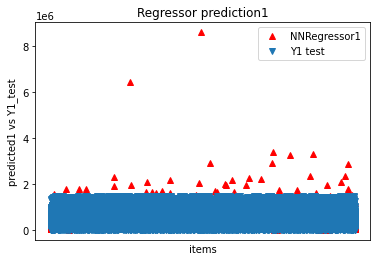

In [51]:
plt.figure()
plt.plot(prediction1, 'r^', label='NNRegressor1')
plt.plot(Y1_test, 'v', label='Y1 test')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted1 vs Y1_test')
plt.xlabel('items')
plt.legend(loc="best")
plt.title('Regressor prediction1')

plt.show()

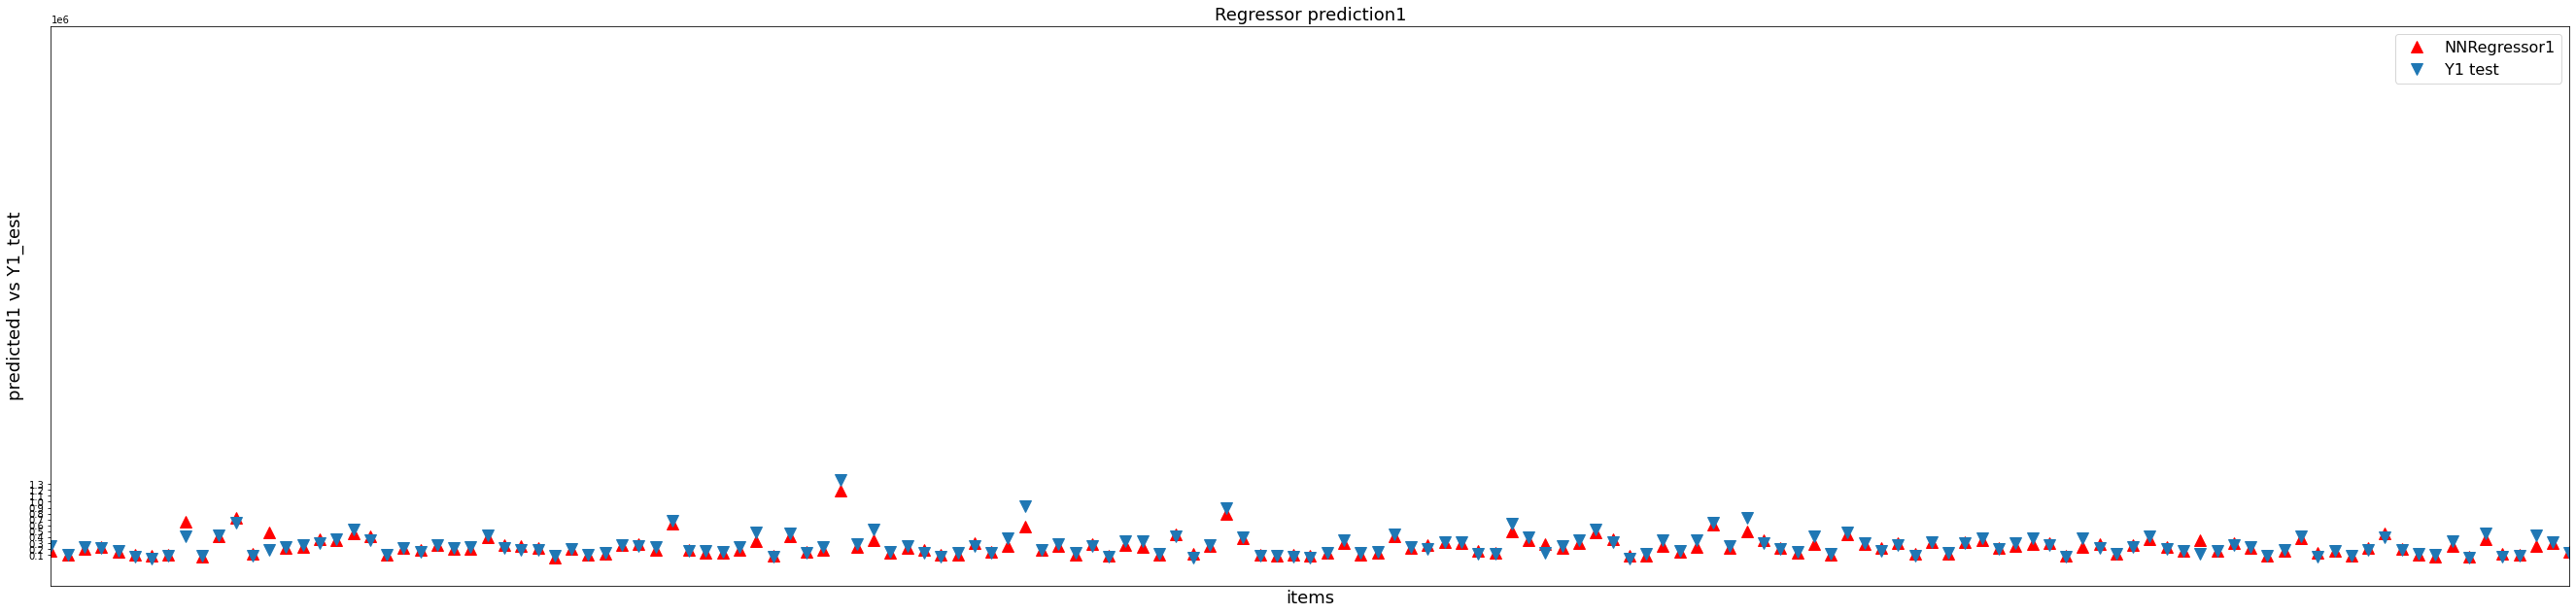

In [52]:
a= plt.figure()
axes= a.add_axes([0,0,6,2])#sequence of [left, bottom, width, height] quantities.
#axes= a.add_axes([0.2,0.2,8,8])
# adding axes
#x= np.arange(0,11)
#axes.plot(prediction, marker='*')
y = np.array([100000, 200000, 300000, 400000, 500000, 600000,700000,800000, 900000, 1000000,1100000,1200000, 1300000,1400000])
plt.yticks(np.arange(y.min(), y.max(), 100000))

axes.plot(prediction1, 'r^', label='NNRegressor1',markersize=12)
axes.plot(Y1_test, 'v', label='Y1 test',markersize=12)
axes.set_xlim([0,150])
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted1 vs Y1_test', fontsize=18)
plt.xlabel('items', fontsize=18)
plt.legend(loc="best",prop={'size': 16})
plt.title('Regressor prediction1', fontsize=18)

plt.show()

In [53]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error1=metrics.mean_squared_error(prediction1,Y1_test)
mean_squared_error1
root_mse1_2=pow(mean_squared_error1,0.5)
root_mse1_2

75559.30502591988

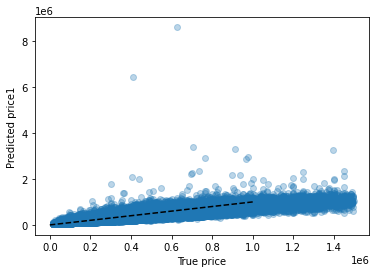

In [55]:
plt.scatter(Y1_test,prediction1,alpha=0.3)
plt.plot([0,1000000],[0,1000000],'--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price1')
plt.show()


In [56]:
mean_squared_error_validation=metrics.mean_squared_error(prediction_validation,Y_Validation)
mean_squared_error_validation
root_msev_2=pow(mean_squared_error_validation,0.5)
root_msev_2

72254.36772961382

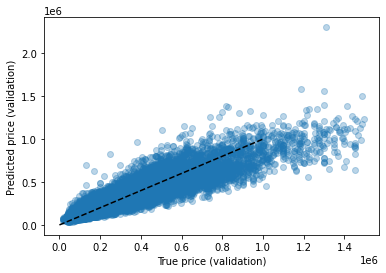

In [57]:
plt.scatter(Y_Validation,prediction_validation,alpha=0.3)
plt.plot([0,1000000],[0,1000000],'--k')
plt.axis('tight')
plt.xlabel('True price (validation)')
plt.ylabel('Predicted price (validation)')
plt.show()